## Exercise 1 

Gaussian Processes is a well-known machine learning algorithm (<a href=https://en.wikipedia.org/wiki/Gaussian_process> Wiki Page </a>). They are heavily related to linear algebra. For this exercise, you won't need to know about Gaussian Processes but you will apply concepts from linear algebra to solve these exercises. 

In [4]:
import numpy as np
from matplotlib import pyplot as plt
from numpy.linalg import inv, norm, svd, matrix_rank
%matplotlib inline

### Exercise 1.1

Covariance kernels encode similarity between the data points. <a href=http://www.gaussianprocess.org/gpml/chapters/RW4.pdf> Read More about it here. </a> One such  type of kernel is defined as: $K(x, z) = min(x, z) - xz$. 

Generate N = 30, random numbers $x_1, ... , x_n$ in the domain (0, 1). Create a matrix $A$ whose $i, j$ entry is $A_{i, j} = K(x_i, x_j)$. 

In [27]:
np.random.seed(seed=72)

In [39]:
x = np.random.uniform(size=30)
x.resize((30, 1))

cov_mat = x.dot(x.T) #column x row transforms into a matrix

# Applying fundamental vector, matrix operations 
X_rep = x.dot(np.ones((1, 30)))
X_t_rep = np.ones((30, 1)).dot(x.T)

A = np.minimum(X_rep, X_t_rep) - cov_mat

### Exercise 1.2

After creating this covariance matrix , create the vector whose the $i$th entry is $y_i = x_i(1 - x_i)$. Then compute, $c=A^{-1}y$. This is a common computation for doing Gaussian Processs. 

In [42]:
y = x * (1 - x) # numpy broadcasting
c = inv(A).dot(y)

array([[ 0.09469006],
       [ 0.09923385],
       [ 0.01387378],
       [ 0.0422254 ],
       [ 0.03357145],
       [ 0.03302529],
       [ 0.0549974 ],
       [ 0.15332814],
       [ 0.0289697 ],
       [ 0.10315847],
       [ 0.04477105],
       [ 0.01806547],
       [ 0.07144378],
       [ 0.02173281],
       [ 0.09738177],
       [ 0.02269889],
       [ 0.08461737],
       [ 0.02194215],
       [ 0.04298632],
       [ 0.12586652],
       [ 0.03712893],
       [ 0.05882571],
       [ 0.03234323],
       [ 0.06692199],
       [ 0.00825475],
       [ 0.16194839],
       [ 0.02466454],
       [ 0.11522025],
       [ 0.15400378],
       [ 0.06738599]])

### Exercise 1.3

Another example of a similarity function across data points is $B_{ij} = e^{-(x_i - x_j)^2}$. Redo Exercise 1.1, 1.2 using this kernel.

In [45]:
B = np.exp(-(X_rep - X_t_rep) ** 2)

### Exercise 1.4

Kernels can often produce ill-conditioned covariance matrices. <a href=https://en.wikipedia.org/wiki/Condition_number>Read about Condition Number here</a>. Compute the singular value decomposition of the matrix. $B = UΣV$ and determine what its numerical rank is, and thus whether it suffers from ill-conditioning.

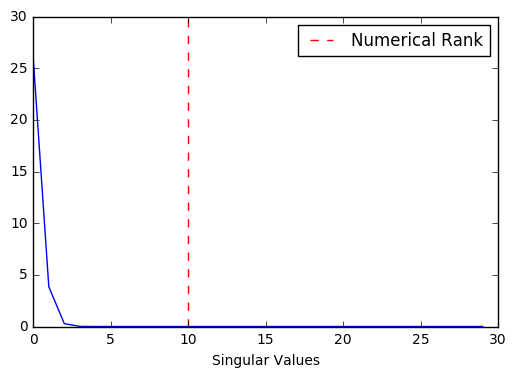

In [112]:
U, sigma, V = svd(B)

condition_num = sigma[0] / sigma[-1] #from the formula in 

rank = matrix_rank(B)

plt.plot(sigma)
plt.axvline(x=rank, linestyle='--', color='red', label='Numerical Rank')
plt.xlabel('Singular Values')
plt.legend()

In [58]:
sigma

array([  2.58634777e+01,   3.84765482e+00,   2.77638955e-01,
         1.09971307e-02,   2.26294103e-04,   4.97587527e-06,
         1.00107515e-07,   1.66347780e-09,   1.72358323e-11,
         2.51189457e-13,   2.53333717e-15,   2.53333717e-15,
         2.53333717e-15,   2.53333717e-15,   2.53333717e-15,
         2.53333717e-15,   2.53333717e-15,   2.53333717e-15,
         2.53333717e-15,   2.53333717e-15,   2.53333717e-15,
         2.53333717e-15,   2.53333717e-15,   2.53333717e-15,
         2.53333717e-15,   2.53333717e-15,   2.53333717e-15,
         2.53333717e-15,   2.53333717e-15,   2.29130153e-15])

### Exercise 1.5

One way to combat ill-conditioning is to perform Regularization. Regularization will come regularly in machine learning. Read more about it <a href=https://en.wikipedia.org/wiki/Regularization_(mathematics)> here </a>.In practice, this consists of adding small noise to the diagonal of the matrix. Compute the perturbed matrix: $B + μI$ , where $I$ is the

appropriately sized identity matrix and $μ = 10^{-10}$ . Then compute a vector $d = (B + μI)^{-1} y$. 

In [107]:
mu = 10 ** -10
B_tik = inv(B + mu * np.eye(30))

In [113]:
print 'Numerical Rank of Regularized Matrix:' , matrix_rank(B_tik)

Numerical Rank of Regularized Matrix: 30


In [115]:
d = B_tik.dot(y)

### Exercise 1.5

Define $U', V'$, as the first 8 columns of and as the upper left 8x8 block of $U, V$, and $Σ'$ for $Σ$.Determine the Frobenius norm of the difference between $B' = U'Σ'V'^{T}$ and B.



In [116]:
U_k, C_k, V_k = U[:, :8], np.diag(sigma[:8]), V[:8, :]
B_k = U_k.dot(C_k).dot(V_k)

In [117]:
print "Forbenius Norm:", norm(B - B_k, 'fro')

Forbenius Norm: 1.72376456373e-11


### Exercise 1.6 

Now, we want to efficiently approximate $d$ using this approximation $B'$ using the Sherman-Morrison-Woodbury formula. Compute $d' = (U' Σ' V'^{T} + \mu I)^{-1}y$ using that formula and determine the 2-norm of $d − d'$.

In [146]:
A = mu * np.eye(30)
SMW = inv(inv(C_k) + V_k.dot(inv(A)).dot(U_k)).dot(V_k).dot(inv(A))
SMW = U_k.dot(SMW)
SMW = inv(A) - inv(A).dot(SMW)

In [147]:
d_ = SMW.dot(y)
print "Two norm:", norm(d - d_, 'fro')

Two norm: 12516.2849833


## Exercise 2: Singular Value Decomposition

Read this <a href=http://www.frankcleary.com/svdimage/> article </a> on image compression with SVD and use numpy apply it to images from the MNIST Datasets. To get the MNIST Datset, use the following comands. Note that the mnist data has shape (70000, 784). You will need to convert it to 28x28 images [Hint: np.reshape].





    from sklearn.datasets import fetch_mldata
    mnist = fetch_mldata('MNIST original')


<img src=http://i.imgur.com/48KrNKq.png>

<img src=http://www.semanticquery.com/archive/semanticsearchart/images/SVD.png>

<img src=https://image.slidesharecdn.com/kunegis-phd-thesis-on-the-spectral-evolution-of-large-networks-presentation-111111095703-phpapp02/95/on-the-spectral-evolution-of-large-networks-phd-thesis-by-jrme-kunegis-12-728.jpg?cb=1321005552>

<img src=http://datinker.com/wp-content/uploads/2016/08/EngMath_Matrix_EigenDecomposition_02.png>

In [2]:
from sklearn import datasets
from sklearn.datasets.mldata import fetch_mldata
from skimage.color import gray2rgb

data = fetch_mldata('mnist-original')
mnist = data['data']

In [17]:
def compute_svdr(img, r):
    U, S, V = svd(img)
    img_apx = U[:, 0:r].dot(np.diag(S[0:r])).dot(V[0:r, :]).astype('uint8')
    return gray2rgb(img_apx)

In [33]:
def create_subplot(figure, target_img, i, rank=None):
    ax = figure.add_subplot('88' + str(i))
    ax.imshow(target_img)
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    
    if rank:
        ax.set_title('Rank %d:' %(rank), fontsize=8)
    else:
        ax.set_title('Actual', fontsize=10)

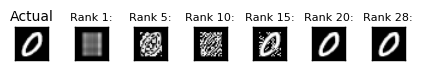

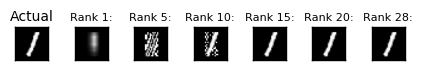

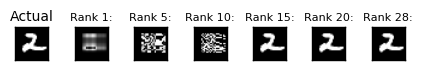

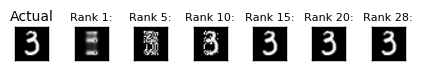

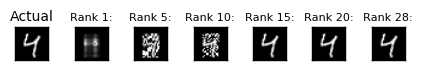

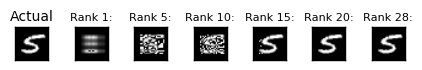

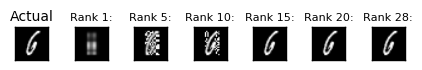

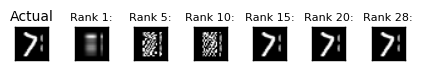

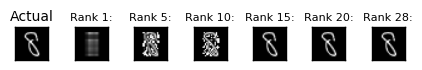

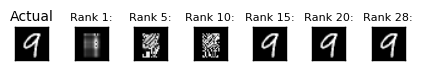

In [36]:
for target in range(10):
    # get a random image that has the target value 
    rand_im = np.random.choice(np.arange(mnist.shape[0])[data['target'] == target], 1)
    target_img = mnist[rand_im].reshape(28, 28)
    figure  = plt.figure()
    create_subplot(figure, gray2rgb(target_img), 1)
    ranks = [1, 5, 10, 15, 20, 28]
    # plot different ranks 
    for idx, rank in enumerate(ranks):
        img_apx = compute_svdr(target_img, rank)
        create_subplot(figure, img_apx, idx + 2, rank)

## Exercise 3: KNN

k-nearest neighbors algorithm is one of the most famous machine learning algorithms. Read about it <a href=https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm> here </a>. In this exercise, you will build k-nn from scratch and apply it on the IRIS data set. This will test your knowledge of numpy and linear algebra. 

In [39]:
from scipy.stats import mode
from __future__ import division

class NearestNeighbor(object):
    def __init__(self, n_neighbors):
        self.n_neighbors = n_neighbors
    
    def fit(self, X, y=None):
        self.X_tr = X 
        self.y_tr = y
    
    def predict(self, X, y=None):
        ## number of data points in test data 
        n_test = X.shape[0]
        
        ## distances ## 
        self.nn_dist = np.zeros((n_test, self.n_neighbors))

        if type(self.y_tr) != type(None): 
            y_pred = np.zeros(n_test)
            
        ## loop over all the test rows 
        for i in range(n_test):
            ## l2 distance 
            distances = np.sum(np.square(self.X_tr - X[i]), axis=1)
            nns = distances.argsort()[:self.n_neighbors]
            self.nn_dist[i] = nns
            
            if type(self.y_tr) != type(None): 
                y_pred[i] = mode(self.y_tr[nns])[0]
        
        if type(self.y_tr) != type(None): 
            if type(y)  != type(None):
                self.acc = np.sum(y_pred == y) / n_test
            return y_pred

In [40]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
y = iris.target

In [45]:
from sklearn.cross_validation import train_test_split
ga_knn = NearestNeighbor(3)
X_train, X_test, y_train, y_test = train_test_split(X, y)

## apply my knn ## 
ga_knn.fit(X_train, y_train)
y_pred = ga_knn.predict(X_test, y_test) 
print 'Accuracy of Our Implementation:', ga_knn.acc

Accuracy of Our Implementation: 0.736842105263


In [46]:
from sklearn.neighbors import KNeighborsClassifier
sk_knn = KNeighborsClassifier(n_neighbors=3)
sk_knn.fit(X_train, y_train)
y_pred = sk_knn.predict(X_test)
print 'Accuracy of SKLearn Implemetnation:', np.sum(y_pred == y_test) / y_test.shape[0]

Accuracy of SKLearn Implemetnation: 0.736842105263
